# Orbit Homework

Megan Ku

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
degrees = UNITS.degree
years = UNITS.year

<Unit('year')>

In [3]:
# And an inition condition (with everything in SI units)

init = State(x=0,
             y=149.6*1000000*1000*m,
             vx=30.3*1000*m/s,
             vy=0*m/s)

,values
x,0
y,149600000000.0 meter
vx,30300.0 meter / second
vy,0.0 meter / second


In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1*years)

,values
init,x 0 y 149600000...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1 year


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with x and y positions
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    print(x, y)
    distance = Vector(x, y)
    print(distance)
    angle = distance.angle
    print(angle.to(degrees))
    
    force = distance.hat() * G * m1 * m2 / (distance.mag**2)
    
    return force

In [6]:
universal_gravitation(init, system)

0 149600000000.0 meter
[0.000e+00 1.496e+11] meter
90.0 degree


<Quantity([0.00000000e+00 3.54223686e+22], 'newton')>

In [7]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)
    
    position = Vector(x, y)

    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [8]:
# Always test the slope function!
slope_func(init, 0, system)

0 149600000000.0 meter
[0.000e+00 1.496e+11] meter
90.0 degree


(<Quantity(30300.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-0.0, 'newton / kilogram')>,
 <Quantity(-0.005931407997083129, 'newton / kilogram')>)

In [9]:
# Here's an event function that stops the simulation
# before the collision
'''
def event_func(state, t, system):
    r, v = state
    return r - system.r_final
    
'''

'\ndef event_func(state, t, system):\n    r, v = state\n    return r - system.r_final\n    \n'

In [10]:
# Always test the event function!
'''
event_func(init, 0, system)
'''

'\nevent_func(init, 0, system)\n'

In [11]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
details

0.0 149600000000.0
[0.000e+00 1.496e+11] dimensionless
90.0 degree
1.4142135390362066e-05 149600000000.0
[1.41421354e-05 1.49600000e+11] dimensionless
90.0 degree
0.0002828427078072413 149600000000.0
[2.82842708e-04 1.49600000e+11] dimensionless
89.9999999999999 degree
0.000424264061710862 149600000000.0
[4.24264062e-04 1.49600000e+11] dimensionless
89.99999999999984 degree
0.0011313708312289646 149600000000.0
[1.13137083e-03 1.49600000e+11] dimensionless
89.99999999999957 degree
0.0012570787013655184 149600000000.0
[1.2570787e-03 1.4960000e+11] dimensionless
89.99999999999952 degree
0.0014142135390362068 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.0014142135390362066 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.00424264061710862 149600000000.0
[4.24264062e-03 1.49600000e+11] dimensionless
89.99999999999838 degree
0.0056568541561448265 149600000000.0
[5.65685416e-03 1.49600000e+11] dimensionless
89.9

-134952649311.2717 -29993659535.854675
[-1.34952649e+11 -2.99936595e+10] dimensionless
-167.46950037304697 degree
-147352075279.9841 -2290509039.0213013
[-1.47352075e+11 -2.29050904e+09] dimensionless
-179.1094395385052 degree
-146433324370.79388 29096267809.76626
[-1.46433324e+11  2.90962678e+10] dimensionless
168.76171782368175 degree
-138536035799.49008 44905274607.31769
[-1.38536036e+11  4.49052746e+10] dimensionless
162.04034030231244 degree
-96630425082.43704 96910787239.8816
[-9.66304251e+10  9.69107872e+10] dimensionless
134.91700187816332 degree
-97646768417.03824 82921001307.15608
[-9.76467684e+10  8.29210013e+10] dimensionless
139.66230074541522 degree
-85490320058.73848 97389853264.12021
[-8.54903201e+10  9.73898533e+10] dimensionless
131.2771618606698 degree
-65405389364.43555 125861750658.51067
[-6.54053894e+10  1.25861751e+11] dimensionless
117.45912110780885 degree
-146580700338.60724 24061544504.06738
[-1.46580700e+11  2.40615445e+10] dimensionless
170.6779092556982 de

,values
sol,None
t_events,[]
nfev,134
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [12]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(31556925.9747, 'second')>

In [13]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(365.24219878124995, 'day')>

In [14]:
# Before plotting, we run the simulation again with `t_eval`
ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, t_eval=ts)

0.0 149600000000.0
[0.000e+00 1.496e+11] dimensionless
90.0 degree
1.4142135390362066e-05 149600000000.0
[1.41421354e-05 1.49600000e+11] dimensionless
90.0 degree
0.0002828427078072413 149600000000.0
[2.82842708e-04 1.49600000e+11] dimensionless
89.9999999999999 degree
0.000424264061710862 149600000000.0
[4.24264062e-04 1.49600000e+11] dimensionless
89.99999999999984 degree
0.0011313708312289646 149600000000.0
[1.13137083e-03 1.49600000e+11] dimensionless
89.99999999999957 degree
0.0012570787013655184 149600000000.0
[1.2570787e-03 1.4960000e+11] dimensionless
89.99999999999952 degree
0.0014142135390362068 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.0014142135390362066 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.00424264061710862 149600000000.0
[4.24264062e-03 1.49600000e+11] dimensionless
89.99999999999838 degree
0.0056568541561448265 149600000000.0
[5.65685416e-03 1.49600000e+11] dimensionless
89.9

15685577384.491241 148803177518.58804
[1.56855774e+10 1.48803178e+11] dimensionless
83.98258366030697 degree
36157282908.14754 146717890302.06473
[3.61572829e+10 1.46717890e+11] dimensionless
76.15584492241322 degree
46070509587.80435 142614614305.16483
[4.60705096e+10 1.42614614e+11] dimensionless
72.09736457607912 degree
88177171805.90343 121020932022.51353
[8.81771718e+10 1.21020932e+11] dimensionless
53.92251062808794 degree
88838016585.7683 118984353172.05914
[8.88380166e+10 1.18984353e+11] dimensionless
53.25365253125168 degree
98509099554.94649 112063625291.08624
[9.85090996e+10 1.12063625e+11] dimensionless
48.68303704516885 degree
107052817745.37202 106585240944.73549
[1.07052818e+11 1.06585241e+11] dimensionless
44.87460036538991 degree
129089611230.28267 85456141787.22302
[1.29089611e+11 8.54561418e+10] dimensionless
33.50419476147964 degree
135306996238.24562 70111549951.9752
[1.35306996e+11 7.01115500e+10] dimensionless
27.39167675452499 degree
150783861517.8974 9751814099

In [15]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [16]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

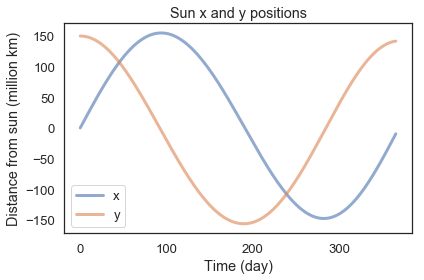

In [20]:
# And plotting
plot(x, label='x')
plot(y, label='y')

decorate(title="Sun x and y positions",
         xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

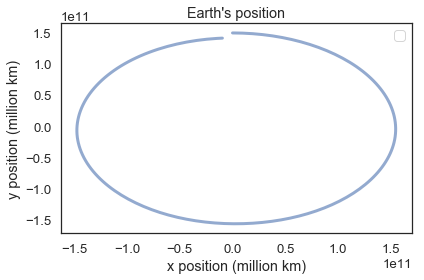

In [19]:
plot(results.x, results.y)
decorate(title="Earth's position",
         xlabel='x position (million km)',
         ylabel='y position (million km)')